# Q4


In [135]:
import numpy as np
import pandas as pd

# Part1: Introduction to Dataset and Preprocessing

## Read `.csv` file and call `.info`.<br/>
The dimention of input equals [205, 16].

In [136]:
df = pd.read_csv("sample_data/CarPrice_Assignment.csv")
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Print `Nan` values count respect to each column

In [138]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Separating some unnecessary columns
First, Separate `CarName` from dataset and save into `CompanyName`.<br/>
Then, delete `CarName`, `car_ID` and `symboling`.<br/>
At last, correct wrong spelling values in `CompanyName`.


In [139]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [140]:
CompanyName = df["CarName"]
df.drop(columns=["CarName", "car_ID", "symboling"], inplace=True)

Find names in `CompanyName` with wrong spelling

In [141]:
def get_unique_company_names(CompanyName):
  CompanyName = [name.split(" ")[0] for name in CompanyName]
  CompanyName_set = set(CompanyName)
  return CompanyName_set

get_unique_company_names(CompanyName)

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

In [142]:
correct_dic = {'Nissan': 'nissan', 'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen'}
for index, name in enumerate(CompanyName):
  first_word_of_string = name.split(" ")[0]
  if first_word_of_string in correct_dic:
    CompanyName[index] = CompanyName[index].replace(first_word_of_string, correct_dic[first_word_of_string])
get_unique_company_names(CompanyName)

<ipython-input-142-1ba53ba08afe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CompanyName[index] = CompanyName[index].replace(first_word_of_string, correct_dic[first_word_of_string])


{'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo',
 'vw'}

## Coorelation Matrix
`enginesize` has the most coorelation with `price`

In [143]:
df.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


## `price` plot respects to `enginesize`

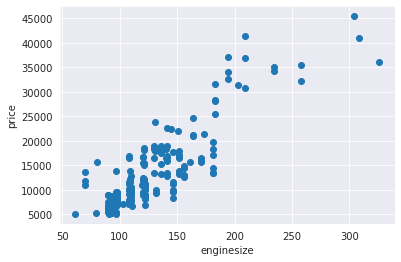

In [144]:
import matplotlib.pyplot as plt

plt.scatter(df['enginesize'], df['price'])
plt.xlabel('enginesize')
plt.ylabel('price')

plt.show()

## `price` distribution

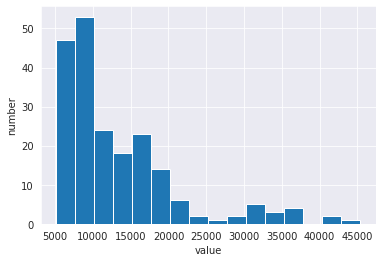

In [145]:
plt.hist(df['price'], bins=16)
plt.xlabel('value')
plt.ylabel('number')
plt.show()

## Convert categorical data to numerical data.

In [146]:
df.nunique()

fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

Convert word to number

In [147]:
!pip install word2number
from word2number import w2n
df['cylindernumber'] = df['cylindernumber'].apply(w2n.word_to_num)
df['doornumber'] = df['doornumber'].apply(w2n.word_to_num)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
categorical_col = ['fueltype', 'aspiration', 'carbody', 'drivewheel',
                   'enginelocation', 'enginetype', 'fuelsystem']

# get the dummies and store it in a df
df = pd.get_dummies(data=df, columns=categorical_col, drop_first=True)

df.head(10)

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,1,0,0,0,0,0,1,0,0
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
6,4,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
7,4,105.8,192.7,71.4,55.7,2954,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
8,4,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0
9,2,99.5,178.2,67.9,52.0,3053,5,131,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0


In [149]:
price = df['price'].values
df.drop(columns=["price"], inplace=True)

## Split data to train set, test set and validation set

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, price, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.175, random_state=42)
len(X_train), len(X_val), len(X_test)

(143, 31, 31)

## Use `MinMaxScaler` to normalize datasets 

In [151]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler().fit(X_train)
# transform data
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
pd.DataFrame(X_train).head(10)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.0,0.320690,0.493103,0.428571,0.200000,0.441478,0.2,0.335938,0.757143,0.871429,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.313793,0.432759,0.171429,0.941667,0.205162,0.2,0.085938,0.364286,0.457143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.244828,0.093103,0.209524,0.400000,0.053850,0.2,0.085938,0.264286,0.638095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.334483,0.489655,0.342857,0.133333,0.245216,0.2,0.156250,0.450000,0.661905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.244828,0.093103,0.209524,0.400000,0.060970,0.2,0.085938,0.264286,0.638095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.406897,0.544828,0.361905,0.350000,0.325768,0.2,0.296875,0.771429,0.680952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.875862,0.941379,0.971429,0.633333,0.843792,0.6,0.914062,0.900000,0.609524,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.341379,0.422414,0.400000,0.266667,0.210948,0.2,0.156250,0.435714,0.719048,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.734483,0.725862,0.628571,0.741667,0.534490,0.2,0.195312,0.657143,0.533333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.0,0.910345,0.948276,0.742857,0.416667,1.000000,0.4,0.734375,0.778571,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Part2: Multi-Layer Perceptron
Create 3 models with 1, 2 & 3 hidden layers.

In [152]:
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization

input_dim = len(X_train[-1])
output_dim = 1

def model_with_1_hidden_layer():
  model = Sequential([
      Dense(128, activation='relu', input_shape=(input_dim,)),
      Dropout(0.1),
      Dense(1, activation='linear')
  ])
  return model

def model_with_2_hidden_layer():
  model = Sequential([
      Dense(256, activation='relu', input_shape=(input_dim,)),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(1, activation='linear')
  ])
  return model

def model_with_3_hidden_layer():
  model = Sequential([
      Dense(256, activation='relu', input_shape=(input_dim,)),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(8, activation='relu'),
      Dropout(0.1),
      Dense(1, activation='linear')
  ])
  return model

## Loss Function and Optimzers

### Loss Functions:
<b>MSE:</b><br/>
is generally used when we have regression type of problem and target variable is continuous.<br/>
MSE = (1/n) * Σ(actual – forecast)^2<br/>
<b>BINARY CROSS ENTROPY / LOG LOSS:</b><br/>
It is almost used for logistic regression problem. 
l=−(ylog(p)+(1−y)log(1−p))<br/>
<b>MAE</b><br/>
MAE is another metric which is used to calculate the loss function.<br/>
<b>MeanAbsolutePercentageError</b><br/>
Computes the mean absolute percentage error between y_true & y_pred.<br/>
loss = 100 * abs((y_true - y_pred) / y_true)<br/>
<b>MeanSquaredLogarithmicError</b><br/>
Computes the mean squared logarithmic error between y_true & y_pred.<br/>
loss = square(log(y_true + 1.) - log(y_pred + 1.))
### Optimizers:
<b>sgd:</b><br/>
Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties.<br/>
Compared to Gradient Descent, Stochastic Gradient Descent is much faster, and more suitable to large-scale datasets. But since the gradient it's not computed for the entire dataset, and only for one random point on each iteration, the updates have a higher variance.<br/>
<b>Adam:</b><br/>
In SGD with momentum it resolved the issue of getting stuck at local minima using the weighted sum of previously accumulated gradient. In RMSProp it resolved the problem of same learning rate for all the parameters using sum of square gradients.

Now, we will look at the most commonly and widely used optimizer i.e. ADAM. It combines both SGD with momentum to resolve local minima problem and RMSProp which uses sum of square of previous gradients to resolve same learning rate issue.<br/>
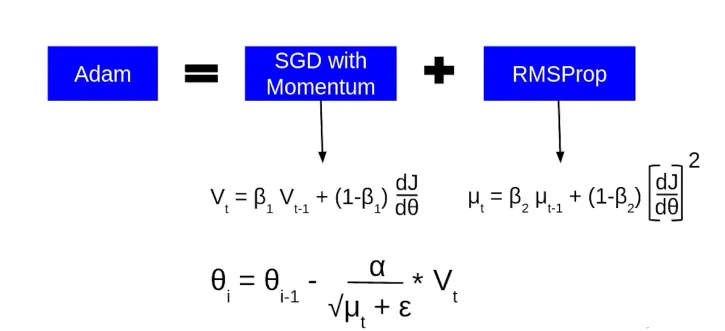

In [153]:
import seaborn as sns

def plot_loss(history):
    # Plot the training accuracy
    sns.set_style("darkgrid")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()    

### Model1: 1 Hidden Layer + Adam + MeanAbsolutePercentageError

In [154]:
from tensorflow.keras.losses import MeanAbsolutePercentageError
model1 = model_with_1_hidden_layer()
model1.compile(optimizer='adam', loss=MeanAbsolutePercentageError())
history1 = model1.fit(X_train, y_train, batch_size=8, epochs=150, validation_data=(X_val, y_val))

Epoch 1/150
18/18 [==============================] - 1s 14ms/step - loss: 99.9933 - val_loss: 99.9835
Epoch 2/150
18/18 [==============================] - 0s 5ms/step - loss: 99.9773 - val_loss: 99.9642
Epoch 3/150
18/18 [==============================] - 0s 6ms/step - loss: 99.9566 - val_loss: 99.9375
Epoch 4/150
18/18 [==============================] - 0s 5ms/step - loss: 99.9281 - val_loss: 99.9007
Epoch 5/150
18/18 [==============================] - 0s 7ms/step - loss: 99.8891 - val_loss: 99.8516
Epoch 6/150
18/18 [==============================] - 0s 11ms/step - loss: 99.8401 - val_loss: 99.7904
Epoch 7/150
18/18 [==============================] - 0s 7ms/step - loss: 99.7791 - val_loss: 99.7159
Epoch 8/150
18/18 [==============================] - 0s 7ms/step - loss: 99.7076 - val_loss: 99.6309
Epoch 9/150
18/18 [==============================] - 0s 5ms/step - loss: 99.6242 - val_loss: 99.5324
Epoch 10/150
18/18 [==============================] - 0s 5ms/step - loss: 99.5249 - val_l

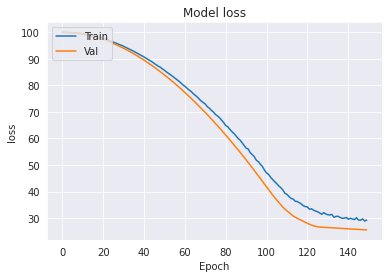

In [155]:
plot_loss(history1)

### Model2: 2 Hidden Layer + Adam + MeanAbsolutePercentageError

In [156]:
model2 = model_with_2_hidden_layer()
model2.compile(optimizer='adam', loss=MeanAbsolutePercentageError())
history2 = model2.fit(X_train, y_train, batch_size=8, epochs=150, validation_data=(X_val, y_val), verbose=0)

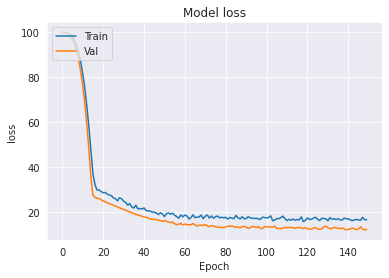

In [157]:
plot_loss(history2)

### Model3: 3 Hidden Layer + Adam + MeanAbsolutePercentageError

In [158]:
model3 = model_with_3_hidden_layer()
model3.compile(optimizer='adam', loss=MeanAbsolutePercentageError())
history3 = model3.fit(X_train, y_train, batch_size=8, epochs=150, validation_data=(X_val, y_val), verbose=0)

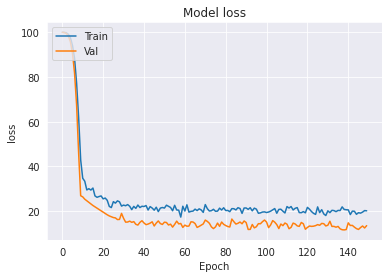

In [159]:
plot_loss(history3)

## R2 Score
The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.<br/>
R2 Score is between 0 and 1, the closer to 1, the better the regression fit.<br/>
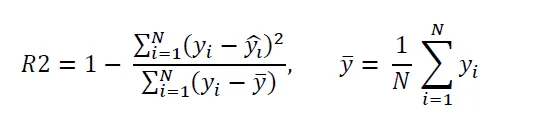

Prediction for three models

In [160]:
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)

1/1 [==============================] - 0s 91ms/step


In [161]:
from sklearn.metrics import r2_score
print("model1 with 1 hiddenlayer-> r2_score: " + str(r2_score(y_test, predictions1)))
print("model2 with 2 hiddenlayer-> r2_score: " + str(r2_score(y_test, predictions2)))
print("model3 with 3 hiddenlayer-> r2_score: " + str(r2_score(y_test, predictions3)))

model1 with 1 hiddenlayer-> r2_score: -0.049613955110175745
model2 with 2 hiddenlayer-> r2_score: 0.5731648367289317
model3 with 3 hiddenlayer-> r2_score: 0.60975721618451


adam + mean_squared_logarithmic_error

In [162]:
model4 = model_with_3_hidden_layer()
model4.compile(optimizer='adam', loss="mean_squared_logarithmic_error")
history4 = model4.fit(X_train, y_train, batch_size=8, epochs=70, validation_data=(X_val, y_val), verbose=0)

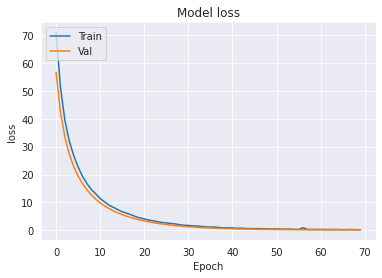

In [163]:
plot_loss(history4)

sgd + MeanAbsolutePercentageError

In [164]:
model5 = model_with_3_hidden_layer()
model5.compile(optimizer='sgd', loss=MeanAbsolutePercentageError())
history5 = model5.fit(X_train, y_train, batch_size=1, epochs=150, validation_data=(X_val, y_val), verbose=0)

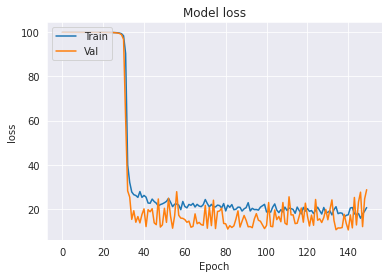

In [165]:
plot_loss(history5)

sgd + mean_squared_logarithmic_error

In [166]:
model6 = model_with_3_hidden_layer()
model6.compile(optimizer='sgd', loss="mean_squared_logarithmic_error")
history6 = model6.fit(X_train, y_train, batch_size=1, epochs=70, validation_data=(X_val, y_val), verbose=0)

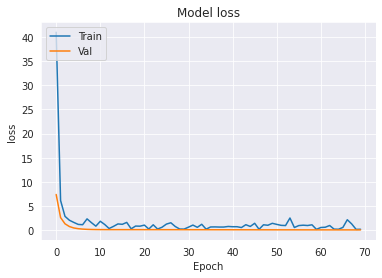

In [167]:
plot_loss(history6)

In [168]:
predictions4 = model4.predict(X_test)
predictions5 = model5.predict(X_test)
predictions6 = model6.predict(X_test)

1/1 [==============================] - 0s 93ms/step


In [169]:
print("model with adam + mean_absolute_percentage_error: " + str(r2_score(y_test, predictions2)))
print("model with adam + mean_squared_logarithmic_error: " + str(r2_score(y_test, predictions4)))
print("model with sgd + mean_absolute_percentage_error: " + str(r2_score(y_test, predictions5)))
print("model with sgd + mean_squared_logarithmic_error: " + str(r2_score(y_test, predictions6)))

model with adam + mean_absolute_percentage_error: 0.5731648367289317
model with adam + mean_squared_logarithmic_error: 0.07250071900865962
model with sgd + mean_absolute_percentage_error: 0.7457766003850628
model with sgd + mean_squared_logarithmic_error: 0.3697821942468238


## Predict 5 sample data from test set

In [174]:
X_test_sample = pd.DataFrame(X_test)
X_test_sample = X_test_sample.sample(5)
y_test_sample = y_test[X_test_sample.index]

In [175]:
y_test_sample

array([ 7999., 13499.,  7775.,  8495.,  6692.])

In [176]:
y_pred = model5.predict(X_test_sample).flatten()
y_pred

1/1 [==============================] - 0s 40ms/step


array([ 4851.508 , 12063.779 ,  7217.191 ,  7343.469 ,  5153.9863],
      dtype=float32)

In [177]:
abs(y_pred - y_test_sample)

array([3147.4921875 , 1435.22070312,  557.80908203, 1151.53076172,
       1538.01367188])